In [252]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tratamento de Base de Dados

In [253]:
original_data = pd.read_csv("cardio.csv", sep=';')
data = original_data.iloc[:, 1:]

X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

print(len(X))

70000


In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [255]:
sc = StandardScaler()
sc.fit(X_train)

X_train_scaled = sc.transform(X_train.values)
X_test_scaled = sc.transform(X_test.values)

# Perceptron

In [261]:
ppn = Perceptron(max_iter=1000, eta0=0.1, random_state=0)
ppn.fit(X_train, y_train.values.ravel())

Perceptron(eta0=0.1)

In [262]:
y_pred = ppn.predict(X_test)

In [263]:
confusion_matrix(y_test, y_pred)

array([[5247,    5],
       [5241,    7]], dtype=int64)

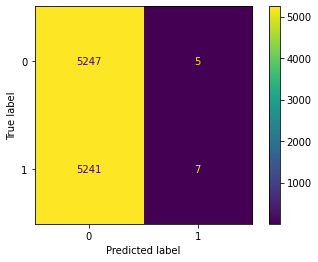

In [264]:
plot_confusion_matrix(ppn, X_test, y_test) 

In [265]:
accuracy_score(y_test, y_pred)

0.5003809523809524

# Perceptron Multicamada

In [266]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [267]:
import random as python_random

SEED = 0

np.random.seed(SEED)
python_random.seed(SEED)
tf.random.set_seed(SEED)

In [268]:
ann = keras.Sequential()
ann.add(layers.Dense(6, activation='relu'))
ann.add(layers.Dense(1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#mencionar que o adam é um stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

In [269]:
history = ann.fit(X_train, y_train, batch_size=128, epochs=100)

Epoch 1/100
465/465 [==============================] - 1s 537us/step - loss: 160.7282 - accuracy: 0.5013
Epoch 2/100
465/465 [==============================] - 0s 597us/step - loss: 0.7452 - accuracy: 0.5038
Epoch 3/100
465/465 [==============================] - 0s 534us/step - loss: 0.7426 - accuracy: 0.50470s - loss: 0.7474 - accuracy: 0.
Epoch 4/100
465/465 [==============================] - 0s 526us/step - loss: 0.8450 - accuracy: 0.5034
Epoch 5/100
465/465 [==============================] - 0s 550us/step - loss: 0.7565 - accuracy: 0.5060
Epoch 6/100
465/465 [==============================] - 0s 506us/step - loss: 0.7624 - accuracy: 0.5026
Epoch 7/100
465/465 [==============================] - 0s 517us/step - loss: 0.7713 - accuracy: 0.50910s - loss: 0.7873 - accuracy: 0.
Epoch 8/100
465/465 [==============================] - 0s 508us/step - loss: 0.7599 - accuracy: 0.5144
Epoch 9/100
465/465 [==============================] - 0s 509us/step - loss: 0.7720 - accuracy: 0.5077
Epoch 1

465/465 [==============================] - 0s 506us/step - loss: 0.6064 - accuracy: 0.7144
Epoch 79/100
465/465 [==============================] - 0s 509us/step - loss: 0.5917 - accuracy: 0.7052
Epoch 80/100
465/465 [==============================] - 0s 513us/step - loss: 0.5914 - accuracy: 0.7120
Epoch 81/100
465/465 [==============================] - 0s 506us/step - loss: 0.6118 - accuracy: 0.7088
Epoch 82/100
465/465 [==============================] - 0s 524us/step - loss: 0.6108 - accuracy: 0.7069
Epoch 83/100
465/465 [==============================] - 0s 515us/step - loss: 0.5935 - accuracy: 0.7066
Epoch 84/100
465/465 [==============================] - 0s 524us/step - loss: 0.6003 - accuracy: 0.7100
Epoch 85/100
465/465 [==============================] - 0s 518us/step - loss: 0.6062 - accuracy: 0.7086
Epoch 86/100
465/465 [==============================] - 0s 513us/step - loss: 0.5988 - accuracy: 0.7134
Epoch 87/100
465/465 [==============================] - 0s 513us/step - loss:

In [288]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

In [290]:
confusion_matrix(y_test, y_pred)

array([[4244, 1008],
       [1963, 3285]], dtype=int64)

In [274]:
accuracy_score(y_test, y_pred)

0.717047619047619